In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df = df.drop('Id',axis=1)
df.corr()['Outcome']

Pregnancies                 0.223796
Glucose                     0.460644
BloodPressure               0.072900
SkinThickness               0.075603
Insulin                     0.123646
BMI                         0.280928
DiabetesPedigreeFunction    0.160664
Age                         0.237050
Outcome                     1.000000
Name: Outcome, dtype: float64

<ipython-input-7-9ddb78972d44>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Outcome',palette='Set2')


<Axes: xlabel='Outcome', ylabel='count'>

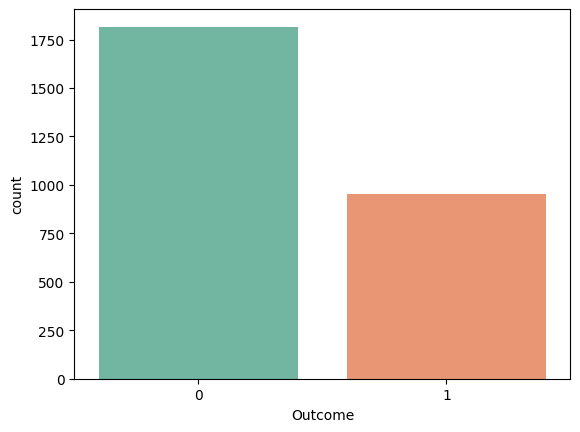

In [ ]:
sns.countplot(data=df,x='Outcome',palette='Set2')

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
#Model - 1 Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.7833935018050542
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[314  40]
 [ 80 120]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.80      0.89      0.84       354
           1       0.75      0.60      0.67       200

    accuracy                           0.78       554
   macro avg       0.77      0.74      0.75       554
weighted avg       0.78      0.78      0.78       554



In [ ]:
#Model -2 Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.9855595667870036
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[354   0]
 [  8 192]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.98      1.00      0.99       354
           1       1.00      0.96      0.98       200

    accuracy                           0.99       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.99      0.99      0.99       554



In [ ]:
#Model - 3 SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.7671480144404332
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[323  31]
 [ 98 102]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.77      0.91      0.83       354
           1       0.77      0.51      0.61       200

    accuracy                           0.77       554
   macro avg       0.77      0.71      0.72       554
weighted avg       0.77      0.77      0.75       554



In [ ]:
#Model - 4 KNN
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8267148014440433
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[306  48]
 [ 48 152]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.86      0.86      0.86       354
           1       0.76      0.76      0.76       200

    accuracy                           0.83       554
   macro avg       0.81      0.81      0.81       554
weighted avg       0.83      0.83      0.83       554



In [ ]:
#Model -5 Random Forest (Best Results)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.9963898916967509
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[354   0]
 [  2 198]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.99      1.00      1.00       354
           1       1.00      0.99      0.99       200

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



# **Conclusion:**

# The best model is Random forest with the accuraccy of **99%**